In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
from gym import envs
#print(envs.registry.all())

4
done
(84, 84, 4)


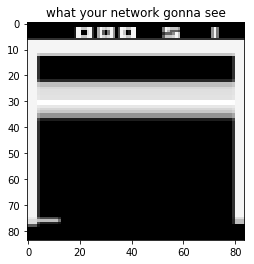

In [4]:
from wrappers import make_atari_deepmind
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#env_name = "PongNoFrameskip-v4"
env_name = "BreakoutNoFrameskip-v4"
env = make_atari_deepmind(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    obs = np.array(obs)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
print (obs.shape)
plt.imshow(obs[:,:,0],interpolation='none',cmap='gray');

In [5]:

from dqnagent import DQNAgent

import networks


#agent.epsilon = 0.5

breakout_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 8,
    'BATCH_SIZE' : 32 * 2,
    'EPSILON' : 0,
    'MIN_EPSILON' : 0,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'ENDDDQN2',
    'IS_DOUBLE' : False,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 420,
    'NUM_STEPS_FILL_BUFFER' : 1000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'MAX_BETA' : 1,
    'CLIP_REWARDS' : True, # I don't clip rewards in wrappers because I want to see right values in tensorboard 
    'LIVES_REWARD' : 5, # 5 for breakout, just divider
    'STEPS_NUM' : 2,
    'NETWORK' : networks.AtariNoisyDuelingDQN()
    }


pong_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 4,
    'BATCH_SIZE' : 32 * 4,
    'EPSILON' : .90,
    'MIN_EPSILON' : 0.02,
    'EPSILON_DECAY_FRAMES' : 100000,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'NAME' : 'PongDDDQN',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 20,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'REPLAY_BUFFER_TYPE' : 'normal',
    'REPLAY_BUFFER_SIZE' : 100000,
    'PRIORITY_BETA' : 0.4,
    'PRIORITY_ALPHA' : 0.6,
    'BETA_DECAY_FRAMES' : 1e5,
    'CLIP_REWARDS' : True,
    'MAX_BETA' : 1,
    'NETWORK' : networks.AtariDuelingDQN(),
    'LIVES_REWARD' : 1,
    'STEPS_NUM' : 1
    }
agent = DQNAgent(env, sess, env_name, config = breakout_dddqn_config)
#agent.restore('nn/NDDDQNBreakoutNoFrameskip-v4')
#agent.epsilon = 0.02

In [ ]:
env.reset()
agent.train()

[1.0, 1.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
saving next best rewards:  2.75
Frames per seconds:  201.74358469191745
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Frames per seconds:  203.67093901133617
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 4.0, 0.0, 0.0, 1.0, 1.0, 1.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
saving next best rewards:  3.5
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 0.0]
Frames per seconds:  203.62895454063056
[1.0, 1.0, 1.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Frames per seconds:  203.50606708828283
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

In [ ]:
#agent.epsilon = 0.2
#agent.train()
import wrappers

In [ ]:
#env_monitor.close()
print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=10000):
    rewards = []
    env._max_episode_steps = 9999
    print('reset')
    #env = env.old_env
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        
            
        if done:
            
            break       
        
    return reward

import gym.wrappers
env_monitor = wrappers.make_atari_deepmind(env_name)
env_monitor = wrappers.ReallyDoneWrapper(env_monitor)
env_monitor = gym.wrappers.Monitor(env_monitor,directory='video_dddqn01',force=True, write_upon_reset=True)
sessions = [print('reward:', evaluate(env_monitor)) for _ in range(1)]
env_monitor.close()

In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()

In [ ]:
import collections
import numpy as np
class ExperienceBuffer:
    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)

    def __len__(self):
        return len(self.buffer)

    def add(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.buffer), batch_size, replace=True)
        states, actions, rewards, dones, next_states = zip(*[self.buffer[idx] for idx in indices])
        return np.array(states), np.array(actions), np.array(rewards, dtype=np.float32), \
               np.array(dones, dtype=np.uint8), np.array(next_states)

from experience import ReplayBuffer
import wrappers
import gym
import time
env = None
def play_step(buf, env, curr_state):
    action = env.action_space.sample()
    
    # do step in the environment
    #qvalues = agent.get_qvalues([curr_state])
    #action = np.argmax(qvalues)
    new_state, reward, is_done, _ = env.step(action)
    curr_state = new_state
    #buf.add(curr_state, action, reward, is_done, new_state)
    #obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch  = buf.sample(32)
    if is_done:
        curr_state = env.reset() 
    return curr_state

def do_test():
    buf = None
    buf = ReplayBuffer(100000)
    frame = 0
    dt = 0
    env = wrappers.make_atari_deepmind("BreakoutNoFrameskip-v4")
    curr_state = env.reset() 
    while True:
        frame += 1
        t1 = time.time()
        curr_state = play_step(buf, env, curr_state)
        t2 = time.time()
        dt += t2 - t1
        
        if frame % 1000 == 0 and frame != 0:
            print(dt)
            print(frame)
            dt = 0
            
        

In [ ]:
do_test()

In [ ]:
import numpy as np
import pandas as pd
def show_mem_usage():
    '''Displays memory usage from inspection
    of global variables in this notebook'''
    gl = sys._getframe(1).f_globals
    vars= {}
    for k,v in list(gl.items()):
        # for pandas dataframes
        if hasattr(v, 'memory_usage'):
            mem = v.memory_usage(deep=True)
            if not np.isscalar(mem):
                mem = mem.sum()
            vars.setdefault(id(v),[mem]).append(k)
        # work around for a bug
        elif isinstance(v,pd.Panel):
            v = v.values
        vars.setdefault(id(v),[sys.getsizeof(v)]).append(k)
    total = 0
    for k,(value,*names) in vars.items():
        if value>1e6:
            print(names,"%.3fMB"%(value/1e6))
        total += value
    print("%.3fMB"%(total/1e6))

In [ ]:
show_mem_usage()

In [ ]:
from collections import deque
s  = deque([], maxlen=2)
s.append(1)
s.append(2)
print(s)
print(s[-1])
s.append(3)
s.clear()
print(s)